# Task - 5

# Analyze traffic accident data to identify patterns related to road conditions, weather and time of day. Visualize to road conditions, weather and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Ash\\Downloads\\Compressed\\archive\\US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.shape

(7728394, 46)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
#counting numerical columns
len(df.select_dtypes(['int64', 'float64']).columns)

13

In [10]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [12]:
# Drop unnecessary columns
df.drop(['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], axis=1, inplace=True)

In [13]:
# Drop rows with missing values in key columns
df.dropna(subset=['Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset'], inplace=True)

In [14]:
# Convert 'Start_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [15]:
# Extract Year, Month, Day of Week, and Hour of Day
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Hour_of_Day'] = df['Start_Time'].dt.hour

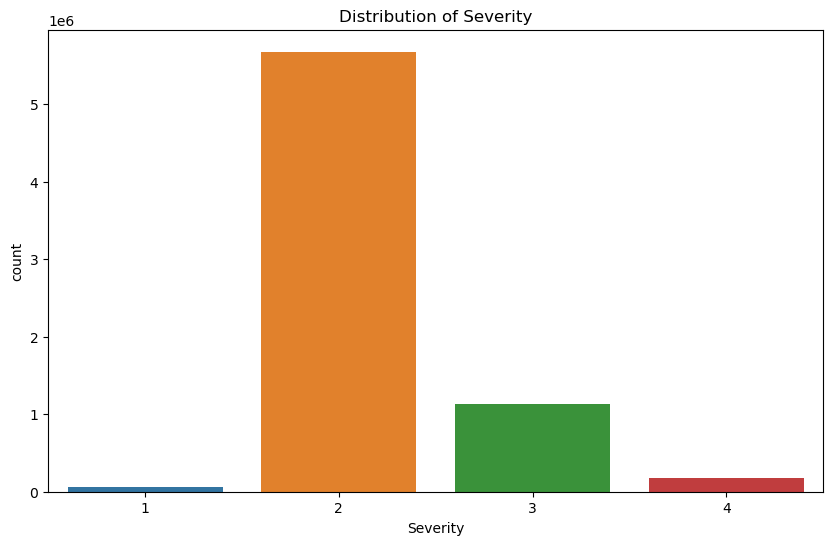

In [16]:
# Distribution of Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Severity')
plt.show()

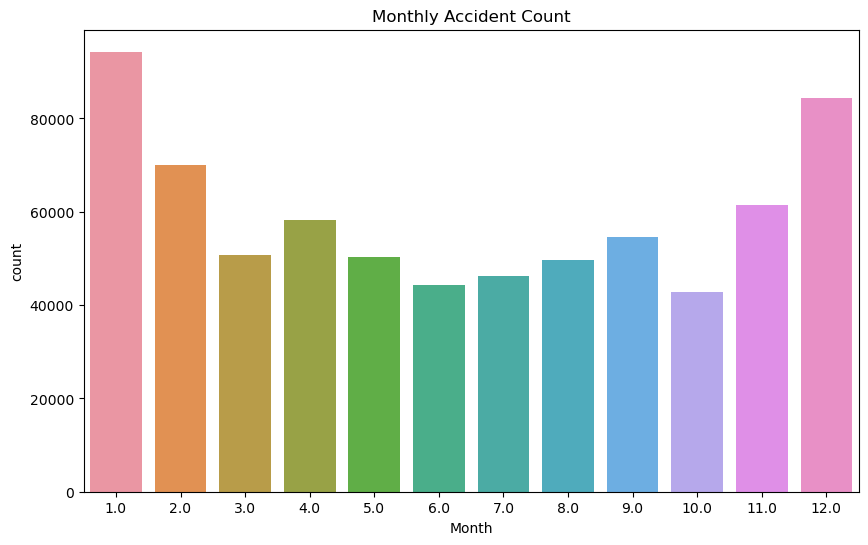

In [17]:
# Monthly accident count
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Monthly Accident Count')
plt.show()

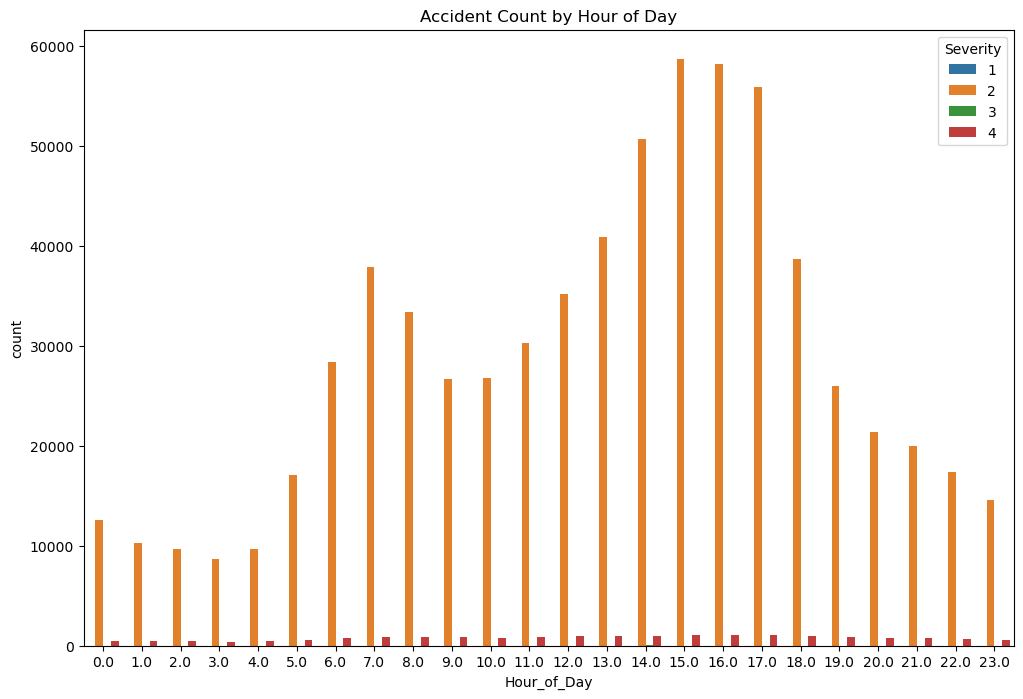

In [18]:
# Distribution of accidents during different hours of the day
plt.figure(figsize=(12, 8))
sns.countplot(x='Hour_of_Day', data=df, hue='Severity')
plt.title('Accident Count by Hour of Day')
plt.show()

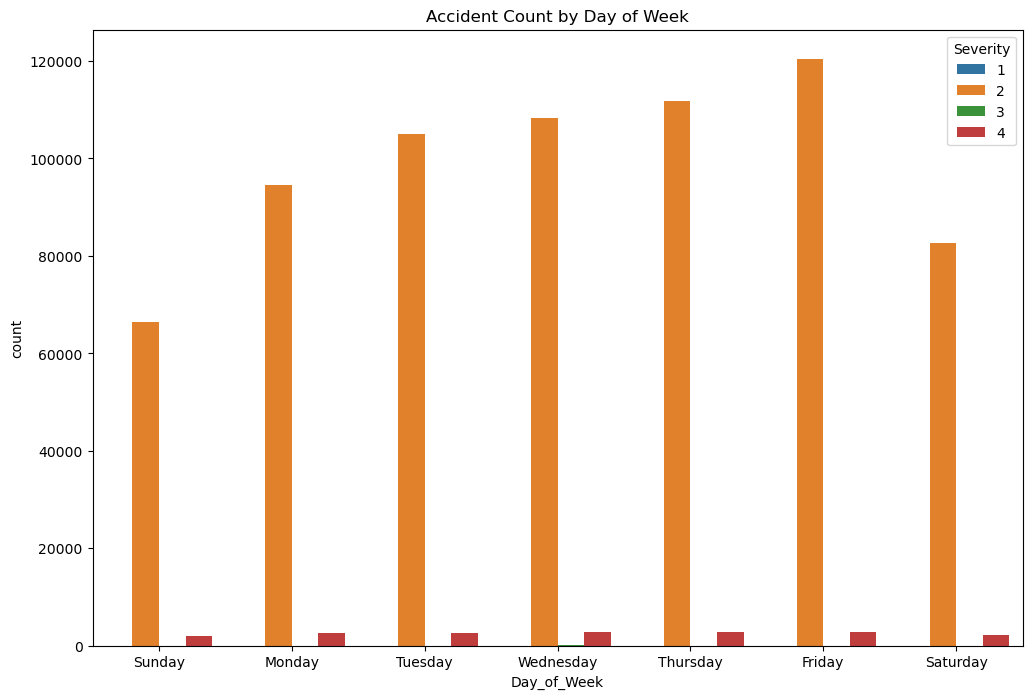

In [19]:
# Distribution of accidents during different days of the week
plt.figure(figsize=(12, 8))
sns.countplot(x='Day_of_Week', data=df, hue='Severity')
plt.title('Accident Count by Day of Week')
plt.show()

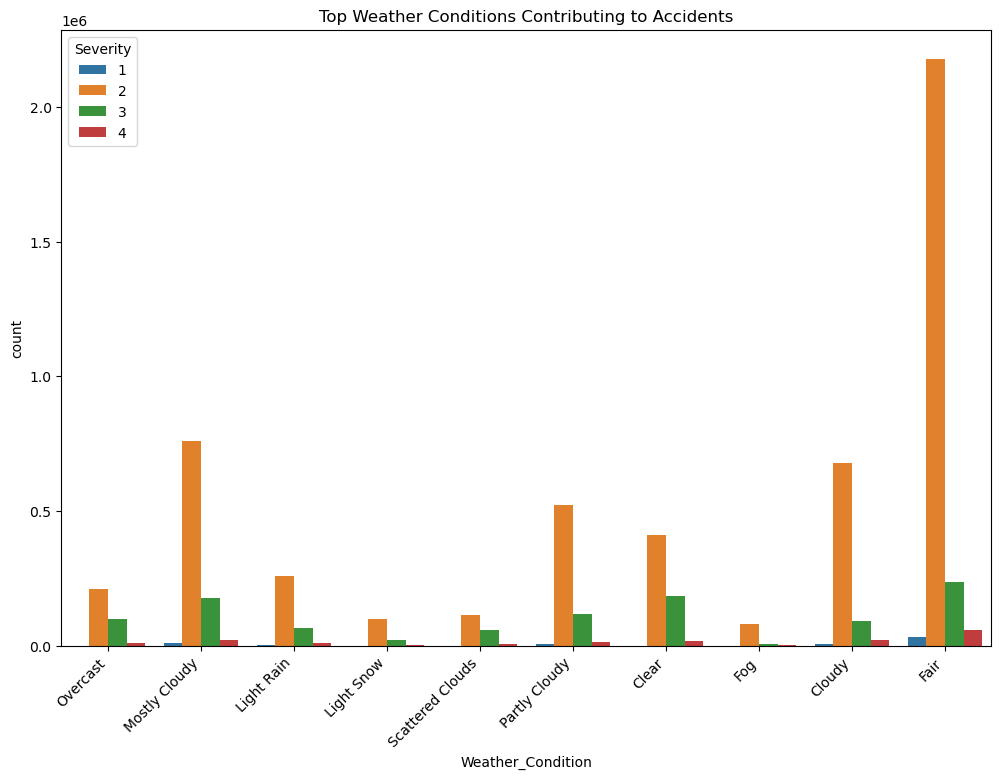

In [20]:
# Top N Weather Conditions contributing to accidents
top_conditions = df['Weather_Condition'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.countplot(x='Weather_Condition', data=df[df['Weather_Condition'].isin(top_conditions)], hue='Severity')
plt.title('Top Weather Conditions Contributing to Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

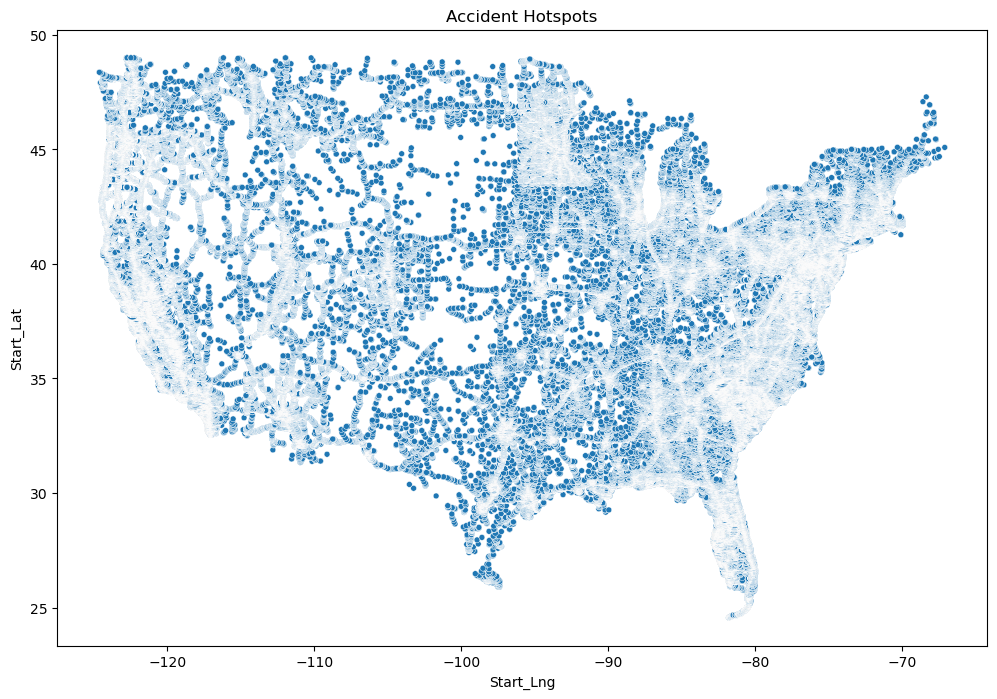

In [21]:
# Heatmap for accident hotspots
plt.figure(figsize=(12, 8))
heatmap_data = df.groupby(['Start_Lat', 'Start_Lng']).size().reset_index(name='Accident Count')
sns.scatterplot(x='Start_Lng', y='Start_Lat', size='Accident Count', data=heatmap_data, legend=False)
plt.title('Accident Hotspots')
plt.show()

In [22]:
# Extracting road type information from the 'Street' column
df['Road_Type'] = df['Street'].apply(lambda x: x.split()[-1] if isinstance(x, str) else None)

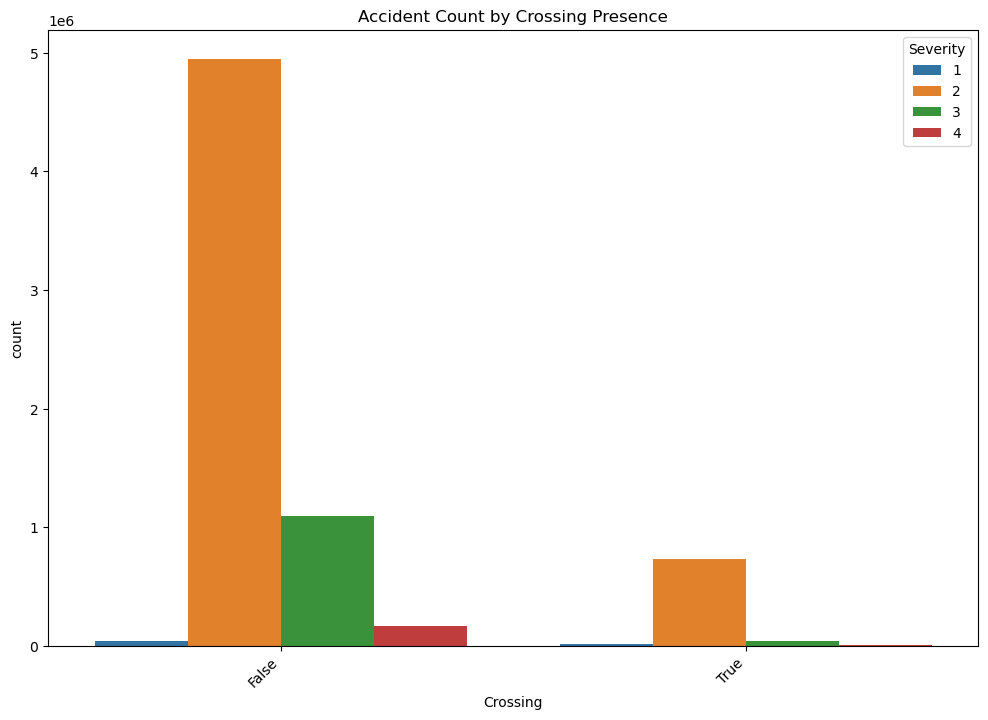

In [23]:
# Distribution of accidents based on crossing presence
plt.figure(figsize=(12, 8))
sns.countplot(x='Crossing', data=df, hue='Severity')
plt.title('Accident Count by Crossing Presence')
plt.xticks(rotation=45, ha='right')
plt.show()

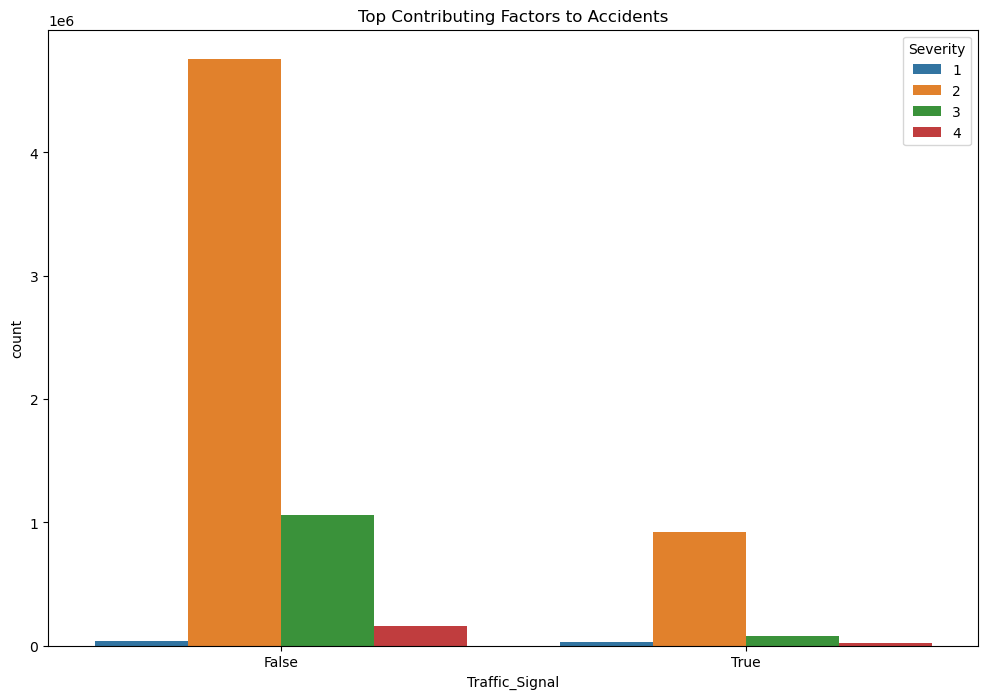

In [24]:
# Top N Contributing Factors to accidents 
top_factors = df['Traffic_Signal'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.countplot(x='Traffic_Signal', data=df[df['Traffic_Signal'].isin(top_factors)], hue='Severity')
plt.title('Top Contributing Factors to Accidents')
plt.show()

In [25]:
# Top N Weather Conditions contributing to accidents
top_conditions = df['Weather_Condition'].value_counts().nlargest(10).index

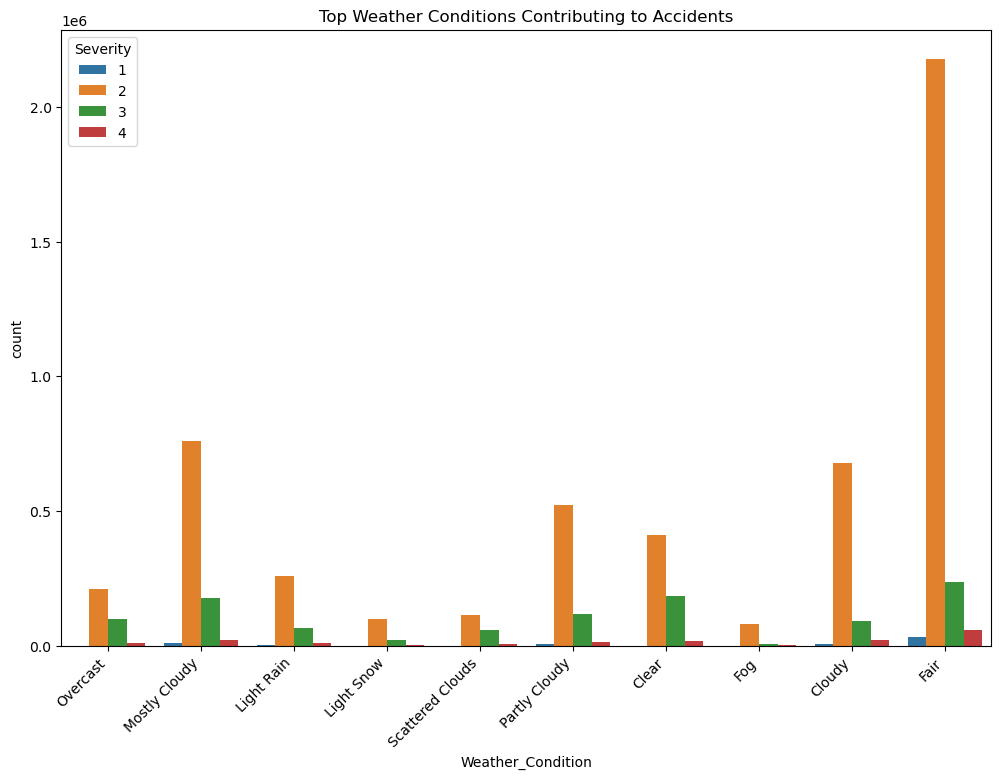

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Weather_Condition', data=df[df['Weather_Condition'].isin(top_conditions)], hue='Severity')
plt.title('Top Weather Conditions Contributing to Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
df['Weather_Condition'] = df['Weather_Condition'].replace({
    'Light Rain': 'Rain',
    'Heavy Rain': 'Rain',
    'Light Snow': 'Snow',
    'Heavy Snow': 'Snow',
    'Fog/Smog/Smoke': 'Fog/Smoke',
    'Blowing Sand/Dirt': 'Sand/Dirt',
    'Blowing Snow': 'Snow',
    'Sleet/Hail/Freezing Rain': 'Sleet/Hail'
})

In [28]:
# Top N Weather Conditions contributing to accidents
top_conditions = df['Weather_Condition'].value_counts().nlargest(10).index

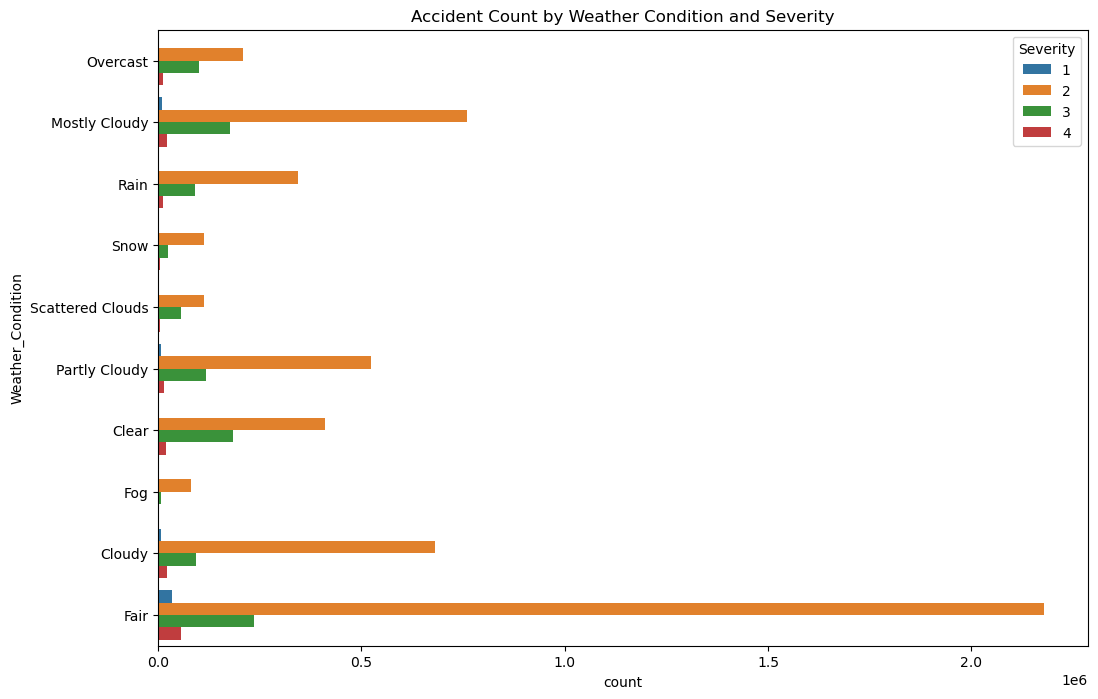

In [29]:
# Distribution of accidents by weather condition and severity (horizontal bar chart)
plt.figure(figsize=(12, 8))
sns.countplot(y='Weather_Condition', data=df[df['Weather_Condition'].isin(top_conditions)], hue='Severity')
plt.title('Accident Count by Weather Condition and Severity')
plt.show()

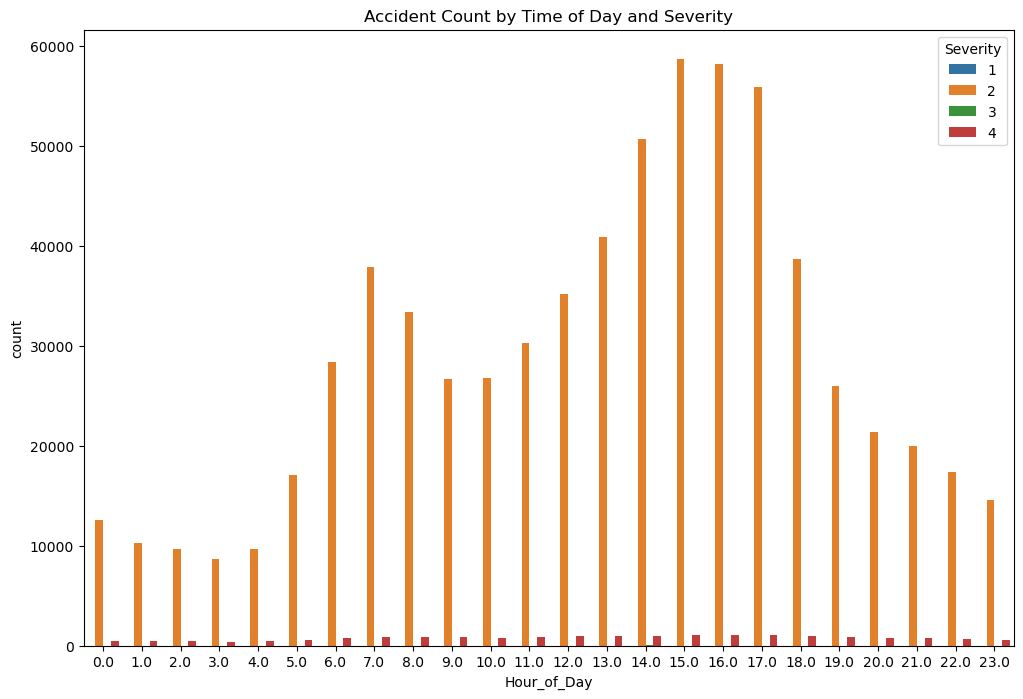

In [30]:
# Distribution of accidents by time of day and severity
plt.figure(figsize=(12, 8))
sns.countplot(x='Hour_of_Day', data=df, hue='Severity')
plt.title('Accident Count by Time of Day and Severity')
plt.xticks(rotation=0)  # Adjust rotation as needed
plt.show()


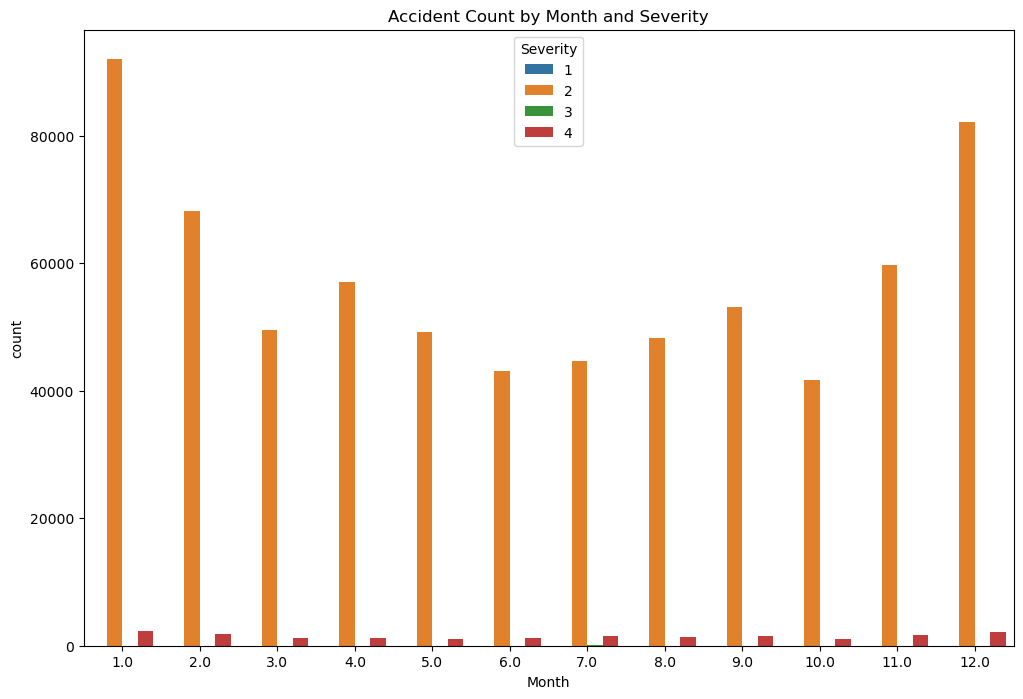

In [31]:
# Distribution of accidents by month and severity
plt.figure(figsize=(12, 8))
sns.countplot(x='Month', data=df, hue='Severity')
plt.title('Accident Count by Month and Severity')
plt.show()

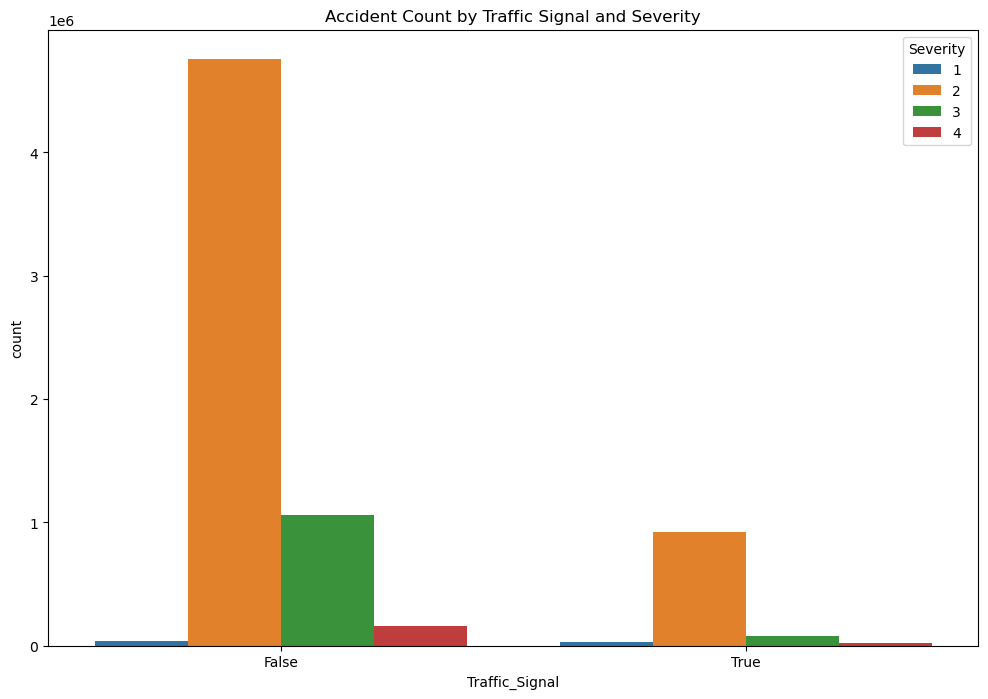

In [36]:
# Distribution of accidents by presence of traffic signal and severity
plt.figure(figsize=(12, 8))
sns.countplot(x='Traffic_Signal', data=df, hue='Severity')
plt.title('Accident Count by Traffic Signal and Severity')
plt.show()

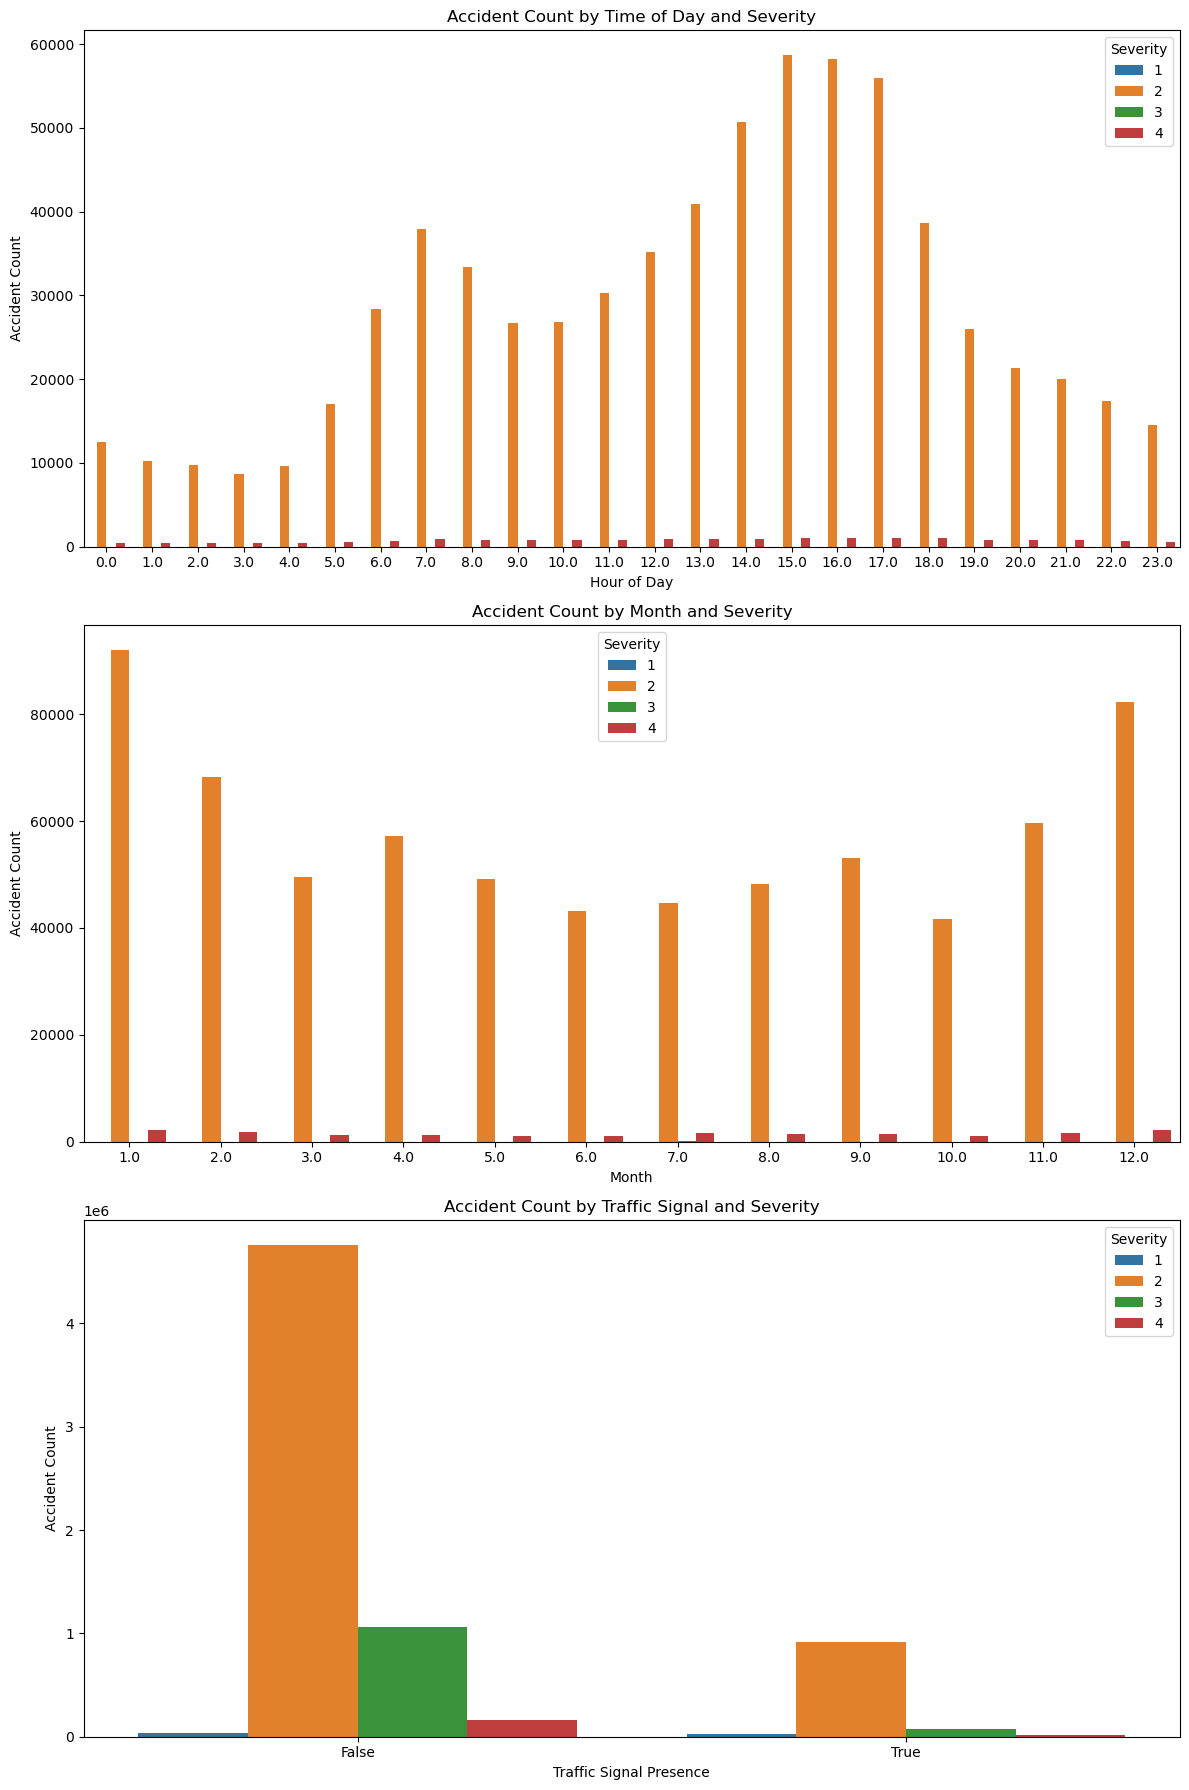